# Lab 5 - Randomness, Simulations, and Probabilities

In [1]:
import pandas as pd
import numpy as np 
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## 1. Randomness using `np.random`

**Randomization** is a method based on chance alone by which the individuals or items to be studied are assigned to a treatment group based on chance. Two primary reasons why randomization is used is to:

    1) Minimize the differences among groups by equally distributing people with 
       particular characteristics among all the trial arms. 
    
    2) Eliminate the presence of bias.

The **np.random** library contains a wide variety of functions that can be used to randomize our data. There are many different functions we can use from this library. Documentation for all of the methods can be found here: https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html

For this lab, we'll stick to using **`np.random.randint.()`** and **`np.random.choice()`**.

**`np.random.choice.()`** picks one item at random from the given array. It is equally likely to pick any of the items. Run the cell below several times, and observe how the results change.

In [2]:
nachos = ['cheese', 'salsa', 'both', 'neither']
np.random.choice(nachos)

'cheese'

To repeat this process multiple times, pass the **size** parameter in as an int `n` as the second argument to return `n` different random choices. By default, **`np.random.choice()`** samples **with replacement** ( but we can change that if we want to ) and returns an *array* of items. 

Run the next cell to see an example of sampling with replacement 10 times from the `nachos` array.

In [3]:
# Run this cell a couple times
np.random.choice(nachos, size =10)

array(['neither', 'salsa', 'both', 'neither', 'neither', 'both', 'salsa',
       'cheese', 'neither', 'cheese'], dtype='<U7')

The **size** parameter can be used to specify rows and colums, so we can create NxN or NxM arrays depending on what we're trying to do.

In [4]:
# Run this cell a couple times
np.random.choice(nachos, size =[3,2])

array([['both', 'both'],
       ['salsa', 'salsa'],
       ['both', 'cheese']], dtype='<U7')

Notice that using **`np.random.choice()`** is good when we are working with categorical data. When we're working with numerical data, we'll want to use **`np.random.randint()`**.

In [5]:
# Run this cell a couple times
np.random.randint(5)

0

Similar to **`np.random.choice()`**, **`np.random.randint()`** has parameters **high** and **size** as optional parameters. Note that **low** is inclusive and **high** is exclusive.

In [6]:
# Run this cell a couple times
one_to_five = np.random.randint(low = 5, high = 11, size = 3)
one_to_five

array([9, 8, 8])

**Question 1:** Using **np.random.choice()**, write a function called `create_boggle_board` that generates a random boggle board. The function should have three parameteers: dxct, rows, columns. Dxct should be a list of all the letters of the alphabet, while rows and columns should the number of rows and columns on the board. Print out a sample boggle board using the function.

In [7]:
dxct = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
rows = 5
columns = 5
def create_boggle_board(dxct,rows,columns):
    boogle_board = np.random.choice(dxct, size =[rows, columns])

    print("boogle_board: ")
    return boogle_board

create_boggle_board(dxct,rows,columns)

boogle_board: 


array([['A', 'H', 'J', 'O', 'M'],
       ['V', 'T', 'O', 'C', 'D'],
       ['J', 'Z', 'D', 'O', 'M'],
       ['Q', 'N', 'T', 'F', 'H'],
       ['I', 'O', 'P', 'Q', 'M']], dtype='<U1')

**Question 2:** Using **np.random.randint()**, generate an array called `one_to_seven` that contains 100 values between one and seven (inclusive), ie [1,7]. Then create a histogram displaying the distribution of the generated values. Your x-axis should be titled "Values." Your y-axis should be titled "Frequency." Your title should be "Distribution of random values from 1 to 7."

In [9]:
one_to_seven = np.random.randint(low = 1, high = 8, size = 100)
one_to_seven

array([2, 1, 1, 3, 6, 1, 3, 2, 5, 6, 1, 1, 2, 5, 2, 6, 4, 3, 1, 6, 5, 2,
       2, 2, 1, 2, 6, 6, 7, 5, 1, 1, 4, 2, 1, 6, 1, 7, 4, 5, 2, 3, 6, 6,
       4, 3, 5, 3, 1, 1, 3, 1, 2, 1, 4, 1, 4, 6, 5, 1, 1, 4, 5, 1, 2, 4,
       4, 6, 4, 7, 4, 1, 1, 7, 1, 4, 3, 3, 3, 3, 6, 5, 1, 5, 4, 5, 6, 3,
       3, 7, 7, 4, 2, 2, 6, 3, 7, 6, 1, 3])

In [10]:
raw_data_dist = pd.DataFrame(one_to_seven, columns = ['Values'])
raw_data_dist 

,Values
0,2
1,1
2,1
3,3
4,6
...,...
95,3
96,7
97,6
98,1


In [11]:
values = [1,2,3,4,5,6,7]
val_frequnecy = []
frequnecy = 0;
count = 0
for v in values:
    frequnecy=0
    for n in one_to_seven:
        if n == v:
            frequnecy=frequnecy+1
    val_frequnecy.append(frequnecy)

    
dist = pd.DataFrame(list(zip(values, val_frequnecy)), columns = ['Values','Frequency'])
dist


,Values,Frequency
0,1,24
1,2,14
2,3,15
3,4,14
4,5,11
5,6,15
6,7,7


In [12]:
raw_data_dist

,Values
0,2
1,1
2,1
3,3
4,6
...,...
95,3
96,7
97,6
98,1


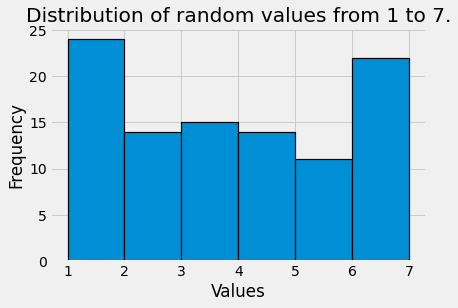

In [13]:


equal_bins = np.arange(1,8)
plt.style.use('fivethirtyeight')
plt.hist(raw_data_dist['Values'], equal_bins, edgecolor = 'black', linewidth = 1.2)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of random values from 1 to 7.")
number_dist = plt.show()
number_dist

## 2. Simulating with Descriptive Statistics

**Simulation** is the process of using a computer to mimic a physical experiment. In this class, those experiments will almost invariably involve chance.

Simulating involves four steps:

    Step 1: What to Simulate 
   
    Step 2: Simulating One Value
   
    Step 3: Number of Repetitions
   
    Step 4: Coding the Simulation
    
Let's do some simple simulations with some real-world examples.

**Question 1:** Whammy time ! Write a program  to simulate a game of Whammy 'n' number of times. 

Your program should have three functions:
    
  1) The first function called `whammy_x_1` should create a random NxM grid from parameters 
     `whammy_prizes`, `rows`, and `columns`. `whammy_prizes`, and should 
     have the string values: 'Whammy',"$100", "$500", "$1000", "$5000", 'Whammy' 
     ( Yes, there are two whammy values ). This function should randomnly return one of the values on the grid.
      
  2) The second function called `whammy_x_n` should take the same parameters 
     as `whammy_x_1` with the addition of the parameter called `reps`. 'reps', 
     which stands for "repitions", will represent the number of times we want to run our 
     simulation.  This function should randomnly populate and return an array called 
     `whammy_results`,by calling `whammy_x_1` 'n' number of times, where 'n' is equal
     to reps
     
  3) The third function called `whammy_bar_plot` should take the array returned 
     from the second function as a parameter. Using that array, create a bar plot
     that shows the count ( or frequency ) of each possible value in he `whammy_results`
     array. Your chart should have a title, a labeled x-axis and a labeled y-axis. Each bar on
     your x-axis should have a label name. Your labels should accuretely convey the information
     you're trying to communicate.


When you call your second function, you can pass **1000** in for the number of simulations
     
**Note:** You can read up about the game Whammy at this link: https://gameshows.fandom.com/wiki/The_Whammy


      

In [14]:
whammy_prizes = ["Whammy","100","500","1000","5000","Whammy"]
rows = 3
columns = 3
def whammy_x_1(whammy_prizes,rows,columns):
    whammy_grid =  np.random.choice(whammy_prizes, size = [rows, columns])
    rand_val = whammy_grid[np.random.randint(3)][np.random.randint(3)]
    return rand_val

#whammy_x_1(whammy_prizes,rows,columns)  

In [15]:
rows = 3
columns = 3
reps = 1000
whammy_prizes = ["Whammy","100","500","1000","5000","Whammy"]
def whammy_x_n(prizes,rows,columns,reps):
    whammy_results = []
    for x in range(reps):
        whammy_results.append(whammy_x_1(prizes,rows,columns))
    return whammy_results

whammy_results = whammy_x_n(whammy_prizes,rows,columns,reps)    

In [16]:
def get_whammy_frequencies(whammy_prizes, whammy_results):
    prize_frequnecy = []
    frequnecy = 0;
    count = 0
    
    for wp in whammy_prizes:
        frequnecy=0
        for wr in whammy_results:
            if wr == wp:
                frequnecy=frequnecy+1
        prize_frequnecy.append(frequnecy)
    return prize_frequnecy

prize_frequnecy = get_whammy_frequencies(whammy_prizes, whammy_results) 
whammy_result_df = pd.DataFrame(list(zip(whammy_prizes, prize_frequnecy)), columns = ['Prizes','Frequency'])
whammy_result_df

,Prizes,Frequency
0,Whammy,322
1,100,179
2,500,144
3,1000,176
4,5000,179
5,Whammy,322


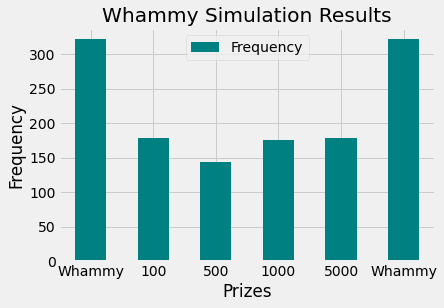

In [18]:
def whammy_bar_plot(whammy_results):
    prize_frequnecy = []
    frequnecy = 0;
    count = 0
    
    for wp in whammy_prizes:
        frequnecy = 0
        for wr in whammy_results:
            if wr == wp:
                frequnecy=frequnecy+1
        prize_frequnecy.append(frequnecy)
    prize_frequnecy = get_whammy_frequencies(whammy_prizes, whammy_results)    
    whammy_result_df = pd.DataFrame(list(zip(whammy_prizes, prize_frequnecy)), columns = ['Prizes','Frequency'])
    whammy_bar_plot = whammy_result_df.plot.bar(x='Prizes', y='Frequency', rot=0, color='teal')
    plt.xlabel("Prizes")
    plt.ylabel("Frequency")
    plt.title("Whammy Simulation Results")
    whammy_bar_plot = plt.show()
    
whammy_bar_plot(whammy_results)


**Question 2:** Whammy time again ! Modify your `whammy_prizes` array from Question 1 to  contain randomly generated values in between 1000 and 10000 (exclusive). Using the steps done in Question 1, randomnly populate the `whammy_results` array and plot the distribution of results using a histogram. Your code should be packaged in functions. Be sure to label **all** parts of your histogram properly. 

**Note:** Your bins can stride by **500** or **1000**, and the number of simulations you run should be **1000**.

In [24]:
new_whammy_prizes = np.random.randint(low = 1000, high = 10000, size = 6)
new_whammy_results = whammy_x_n(new_whammy_prizes,rows,columns,reps)
prize_frequnecy = get_whammy_frequencies(new_whammy_prizes, whammy_results) 
new_whammy_result_df = pd.DataFrame(list(zip(new_whammy_prizes, prize_frequnecy)), columns = ['Prizes','Frequency'])
# New whammy prize numbers 1000 - 10000
raw_whammy_result_df = pd.DataFrame(new_whammy_results, columns = ['Prize Numbers'])
raw_whammy_result_df

,Prize Numbers
0,8527
1,9076
2,9076
3,8527
4,6639
...,...
995,6639
996,9076
997,6639
998,9076


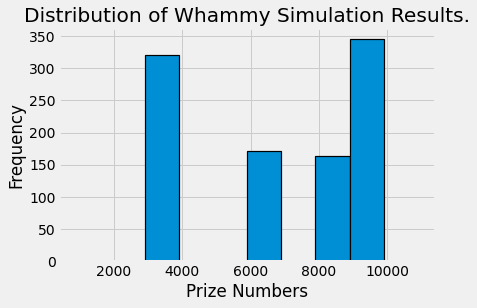

In [25]:
def create_histogram(raw_whammy_result_df):
    equal_bins = np.arange(900, 11000, 1000)
    plt.style.use('fivethirtyeight')
    plt.hist(raw_whammy_result_df['Prize Numbers'], equal_bins, edgecolor = 'black', linewidth = 1.2)
    plt.xlabel("Prize Numbers")
    plt.ylabel("Frequency")
    plt.title("Distribution of Whammy Simulation Results.")
    plt.show()

create_histogram(raw_whammy_result_df)

## 3. Using Simulations to get Probabilities 

**Note:** Reading from Chapter 9.5 of the Computational and Inferential Textbook will make understanding this section simpler.

A **probability** is a number that reflects the chance or likelihood that a particular event will occur.

Probabilities can be understood in various ways, but in data science, probabilities will be understood as **relative frequencies**.The ways in which probabilities are calculated and combined are consistent across the different interpretations.

By convention, probabilities are numbers between 0 and 1, or, equivalently, 0% and 100%. Impossible events have probability 0. Events that are certain have probability 1.

Using a "deck of cards", lets ask some questions to understand probablities better.

**Note:** A playing card has a "suit" ("♠︎", "♣︎", "♥︎", or "♦︎") and a "rank" (2 through 10, J, Q, K, or A).  There are 4 suits and 13 ranks, so there are $4 \times 13 = 52$ different cards.

In [19]:
cards = pd.read_csv('deck.csv')
suits = ["♠︎", "♣︎", "♥︎","♦︎"]
cards

,Rank,Suit
0,2,♠︎
1,2,♣︎
2,2,♥︎
3,2,♦︎
4,3,♠︎
5,3,♣︎
6,3,♥︎
7,3,♦︎
8,4,♠︎
9,4,♣︎


**Question 1:** Write a function that simulates drawing from a deck of 52 cards **once**, and answer the following question:
        
        What is the probability that you will draw a card with the suit "♠︎" and rank "5" ?
        
**Note:** Your answer should be a **single value**.

In [20]:
def draw_a_card():
    card_index = np.random.randint(52)
    return card_index

draw_a_card()
cards.iloc[draw_a_card()]
# The probability of chosing a card  with the suit "♠︎" and the rank "5" is about 2%.

Rank     3
Suit    ♣︎
Name: 5, dtype: object

**Question 2:** Write a function that simulates drawing from a deck of 52 cards **4 times without replacement**, and answer the following question:
        
        What is the probability that you will draw a card with suit "♣︎" ?
        
**Note:** Your answer should be a **table** with 2 columns and four rows. The column names should be "Draw" and "Probability", and should show the probability of drawing rank '10' on the corresponding draw.

In [21]:
def draw_four_cards():
    draws = []
    for x in range(4):
        card_index = draw_a_card()
        print(cards.iloc[card_index])
        draws.append(card_index)
        cards.drop(card_index)
    return draws
        
#draw_four_card()

def get_probability_of_clubs(draws):
    probability = []
    card_count = 52
    clubs_count = 13
    for d in draws:
        # if card at index is of suit 
        if cards.iloc[d]['Suit'] == "♣︎":
            clubs_count = clubs_count - 1
            card_count = card_count - 1
            probability.append((clubs_count/card_count)*100)
        else:
            card_count = card_count - 1
            probability.append((clubs_count/card_count)*100)
    return probability  
            
draws = draw_four_cards()
probablity = get_probability_of_clubs(draws)

card_results = pd.DataFrame(list(zip(draws, probablity)), columns = ['Draw','Probablity'])
card_results
# The probability of chosing a card  with the suit "♣︎" is 25%.

Rank     7
Suit    ♠︎
Name: 20, dtype: object
Rank     4
Suit    ♣︎
Name: 9, dtype: object
Rank     6
Suit    ♦︎
Name: 19, dtype: object
Rank     Q
Suit    ♦︎
Name: 43, dtype: object


,Draw,Probablity
0,20,25.490196
1,9,24.000000
2,19,24.489796
3,43,25.000000


**Question 3:** Write a function that simulates drawing from a deck of 52 cards **10 times without replacement**, and answer the following question:
        
        What is the probability that you will draw a card with suit "♥︎" and "♦︎"?

**Note:** Your answer should be a **table** with 2 columns and 10 rows. The column names should be "Draw" and "Probability", and should show the probability of drawing suit "♥︎" or "♦︎" on the corresponding draw.

In [22]:
def draw_10_cards():
    draws = []
    for x in range(10):
        card_index = draw_a_card()
        print(cards.iloc[card_index])
        draws.append(card_index)
        cards.drop(card_index)
    return draws

def get_probability_of_hearts_x_diamonds(draws):
    probability = []
    card_count = 52
    hearts_count = 13
    diamonds_count = 13
    for d in draws:
        # if card at index is of suit 
        if cards.iloc[d]['Suit'] == "♦︎":
            if diamonds_count < 13:
                card_count = card_count - 1
            else: 
                diamonds_count = diamonds_count - 1
            probability.append((hearts_count/card_count)*100)
        elif cards.iloc[d]['Suit'] == "♥︎":
            if hearts_count < 13:
                card_count = card_count - 1
            else: 
                hearts_count = hearts_count - 1
            probability.append((diamonds_count/card_count)*100)
        else:
            card_count = card_count - 1
            probability.append((((diamonds_count/card_count)*(hearts_count/card_count))*100))
    return probability

draws = draw_10_cards()
probablity = get_probability_of_hearts_x_diamonds(draws)

card_results2 = pd.DataFrame(list(zip(draws, probablity)), columns = ['Draw','Probablity'])
card_results2


Rank     A
Suit    ♣︎
Name: 49, dtype: object
Rank     Q
Suit    ♠︎
Name: 40, dtype: object
Rank     K
Suit    ♦︎
Name: 47, dtype: object
Rank     9
Suit    ♥︎
Name: 30, dtype: object
Rank     2
Suit    ♠︎
Name: 0, dtype: object
Rank    10
Suit    ♣︎
Name: 33, dtype: object
Rank     8
Suit    ♦︎
Name: 27, dtype: object
Rank     7
Suit    ♥︎
Name: 22, dtype: object
Rank     6
Suit    ♦︎
Name: 19, dtype: object
Rank     5
Suit    ♦︎
Name: 15, dtype: object


,Draw,Probablity
0,49,6.497501
1,40,6.760000
2,47,26.000000
3,30,24.000000
4,0,5.997501
5,33,6.250000
6,27,25.531915
7,22,26.086957
8,19,26.666667
9,15,27.272727


**Question 4:** Write a function that simulates drawing from a deck of 52 cards **1000 times with replacement**, and answer the following question:

        What is the probability that you will draw a card with a rank between 2 and 10 ( inclusive ) ?
        
**Note:** Your answer should be a a **histogram** and should show the frequency distribution of the values between 2 and 10 ( inclusive ). Be sure to label **all** parts of your histogram properly. 

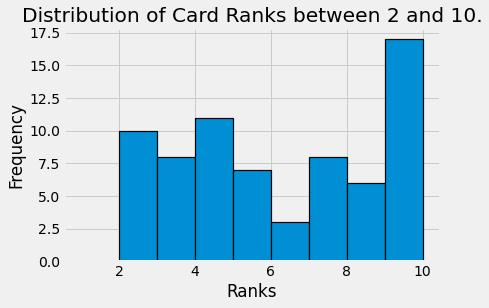

In [29]:
def draw_100_cards():
    draws = []
    for x in range(100):
        card_index = draw_a_card()
        # print(cards.iloc[card_index])
        draws.append(card_index)
    return draws

def get_probability_ranks_2to10(draws):
    probability = []
    card_count = 52
    cards2to10 = 32
    for d in draws:
            probability.append((cards2to10/card_count)*100)
    return probability

card_nums = []
for d in draws:
    if cards.iloc[d]['Rank'] == 'Q' or cards.iloc[d]['Rank'] == 'K' or cards.iloc[d]['Rank'] == 'J' or cards.iloc[d]['Rank'] == 'A':
            continue
    else:
        card_rank_to_number = int(cards.iloc[d]['Rank'])
        card_nums.append(card_rank_to_number)

draws = draw_100_cards()
probablity = get_probability_ranks_2to10(draws)

card_results3 = pd.DataFrame(list(zip(draws, probablity)), columns = ['Draw','Probablity'])
#card_results3

cards_Freq = pd.DataFrame(card_nums, columns = ['Ranks'])


equal_bins = np.arange(1,11)
plt.style.use('fivethirtyeight')
plt.hist(cards_Freq['Ranks'], equal_bins, edgecolor = 'black', linewidth = 1.2)
plt.xlabel("Ranks")
plt.ylabel("Frequency")
plt.title("Distribution of Card Ranks between 2 and 10.")
card_dist = plt.show()
card_dist

**Question 5:** Write a function that simulates drawing from a deck of 52 cards **50 times with replacement** and answer the following question:

        What is the probability that you will draw a card with a rank that is a letter (J, Q, K, A) ?
        
**Note:** You should have **two** answers: 
    
   (1) The first should be a **table** with 2 columns and 50 rows. The column names should 
    be "Draw" and "Probability", and should show the probability of drawing rank with a letter on the corresponding draw.
    
   (2) The second should be a **scatterplot** of the table from answer (1).

In [25]:
def draw_50_cards():
    draws = []
    for x in range(50):
        card_index = draw_a_card()
        # print(cards.iloc[card_index])
        draws.append(card_index)
    return draws

def get_probability_ranks_face_cards(draws):
    probability = []
    for d in draws:
        # if card at index is of suit 
        probability.append((16/card_count)*100)
    return probability

draws = draw_100_cards()
probablity = get_probability_ranks_2to10(draws)

card_results4 = pd.DataFrame(list(zip(draws, probablity)), columns = ['Draw','Probablity'])
card_results4


,Draw,Probablity
0,7,61.538462
1,25,61.538462
2,35,61.538462
3,32,61.538462
4,17,61.538462
...,...,...
95,43,61.538462
96,29,61.538462
97,17,61.538462
98,7,61.538462


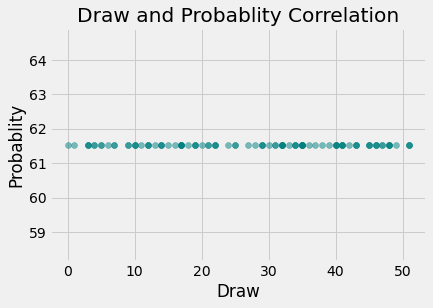

In [30]:

draw = card_results4['Draw'].values
prob = card_results4['Probablity'].values

plt.scatter(draw, prob, c='teal', alpha=0.5)
plt.title('Draw and Probablity Correlation')
plt.xlabel('Draw')
plt.ylabel('Probablity')
plt.show()